## Introduction: Understanding The King County House Sales Market

The housing market is a crucial component of the economy that influences investment decisions. Accurate prediction of house prices can benefit various stakeholders, including buyers, sellers, investors, and policymakers. The King County House Sales dataset provides a rich source of information to explore the factors influencing house prices.

This project aims to provide a comprehensive analysis of King County House sales market, focusing on key factors that influence housing prices. By leveraging statistical techniques, particularly linear and multiple linear regression models, we aim to to analyze and predict house prices in King County and uncover insights that will empower stakeholders to make informed decisions.

## Problem Statement

In the dynamic real estate market of King County, accurately predicting house prices is a complex yet essential task. Real estate agents, buyers, and sellers need reliable models to make informed decisions. The aim is to develop a robust model that can predict house prices based on various property features, ensuring higher accuracy and reliability in a competitive market.

## Objectives

To add

## Imports

In [1]:
#imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

## Data Loading

In [2]:
df = pd.read_csv("./data/kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


## Data Checks

In [3]:
# Previewing the top of the dataset
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
# Previewing the bottom of the dataset
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [5]:
# Checking if columns are named appropriately
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Kings County Dataset Column Description
 - **id** - unique identified for a house
 - **date** - Date house was sold
 - **price** - Price is prediction target
 - **bedrooms** - Number of Bedrooms/House
 - **bathrooms** - Number of bathrooms/bedrooms
 - **sqft_living** - square footage of the home
 - **sqft_lot** - square footage of the lot
 - **floors** - Total floors (levels) in house
 - **waterfront** - House which has a view to a waterfront
 - **view** - Has been viewed
 - **condition** - How good the condition is ( Overall )
 - **grade** - overall grade given to the housing unit, based on King County grading system
 - **sqft_above** - square footage of house apart from basement
 - **sqft_basement** - square footage of the basement
 - **yr_built** - Built Year
 - **yr_renovated** - Year when house was renovated
 - **zipcode** - zip
 - **lat** - Latitude coordinate
 - **long** - Longitude coordinate
 - **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
 - **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

## Exploratory Data Analysis (EDA)

In [6]:
# Checking the shape of the data
df.shape

(21597, 21)

 - **Number of Rows (Observations)**: There are 21597 rows in the DataFrame.
 - **Number of Columns (Variables)**: There are 21 columns (or variables) in the DataFrame.

Checking on the data types

In [7]:
# Checking on the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Checking data description of numerical columns

In [8]:
# Checking the structure of the dataset to identify anomalies
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Data Cleaning

Dropping the following features befor checking for null values:
 - **date**
 - **view**
 - **sqft_above**
 - **sqft_basement**
 - **yr_renovated**
 - **zipcode**
 - **lat**
 - **long**
 - **sqft_living15**
 - **sqft_lot15**

In [9]:
# Drop specified columns
columns_to_drop = [
    'date', 'view', 'sqft_above', 'sqft_basement', 
    'yr_renovated', 'zipcode', 'lat', 'long', 
    'sqft_living15', 'sqft_lot15'
]
df = df.drop(columns=columns_to_drop)

Checking if the column drop was successful

In [10]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987


Checking for null values

In [11]:
df.isnull().sum()

id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

The output indicates the count of missing values (NaN or null values) for each column in the King County House Sales dataset:

    waterfront: 2376 mising values.
    id, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, condition, grade, yr_built: No missing values.

In [12]:
# fill null values with mean
df['waterfront'].fillna((df['waterfront'].mean), inplace=True)
# other options = mode , median

Rechecking for null values

In [13]:
# check for missing values after clean-up
df.isna().sum()

id             0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
dtype: int64

## Pair Plot

Pair plotting to show how different columns affect one another.

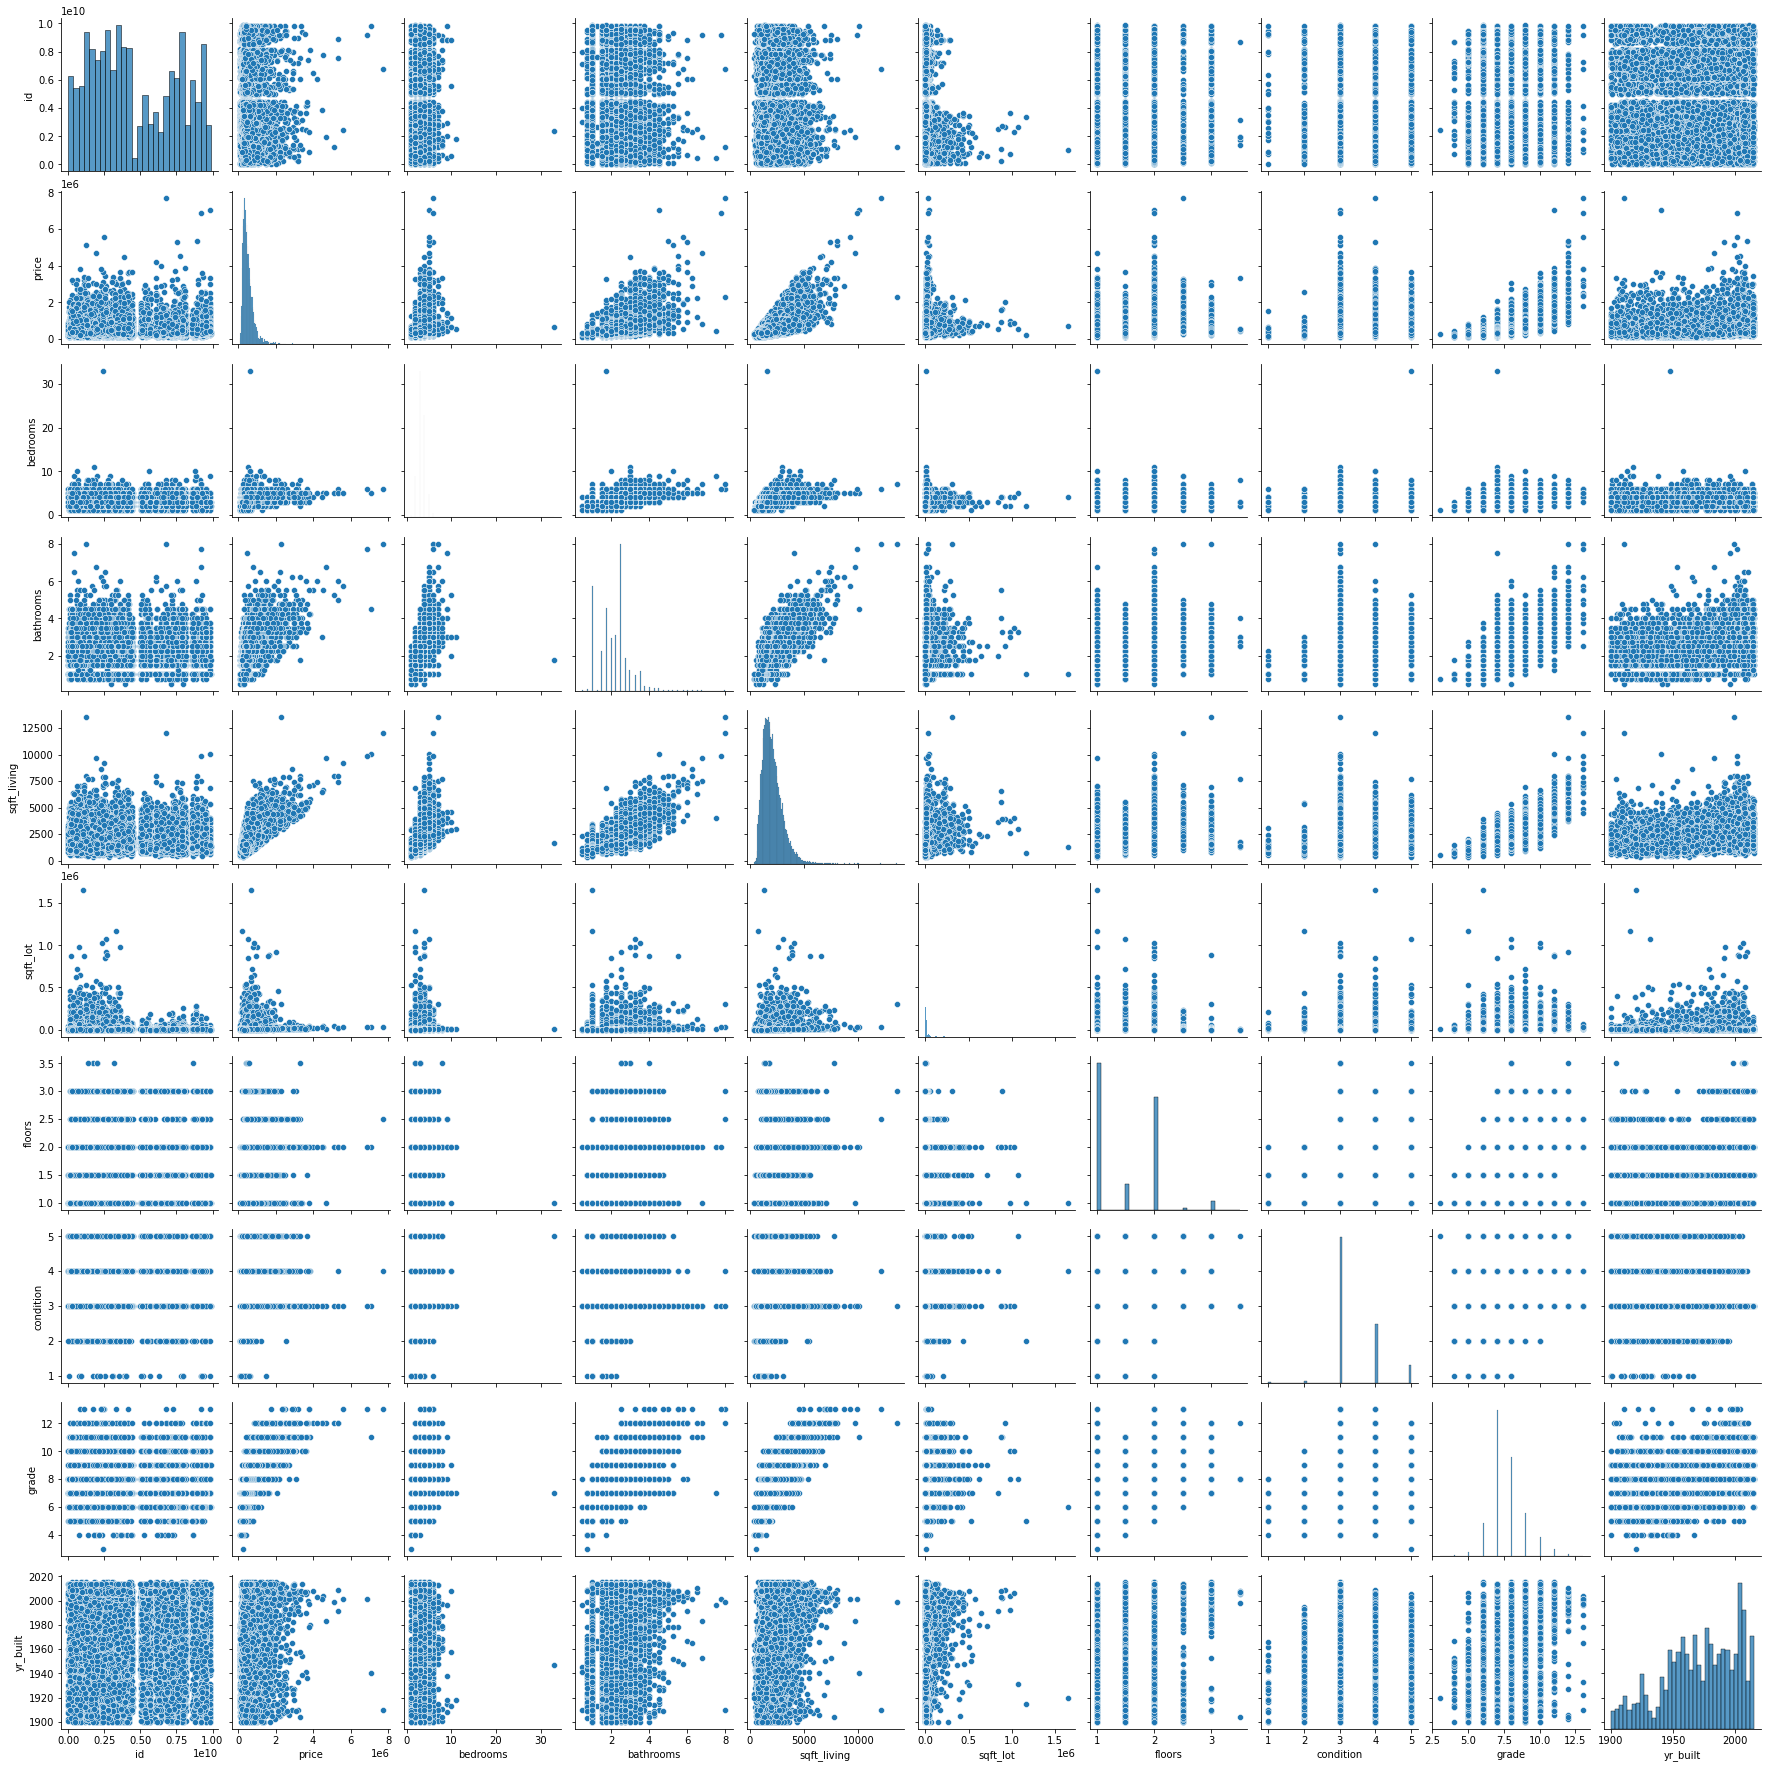

In [14]:
sns.pairplot(data=df)

## Correlation Heatmap

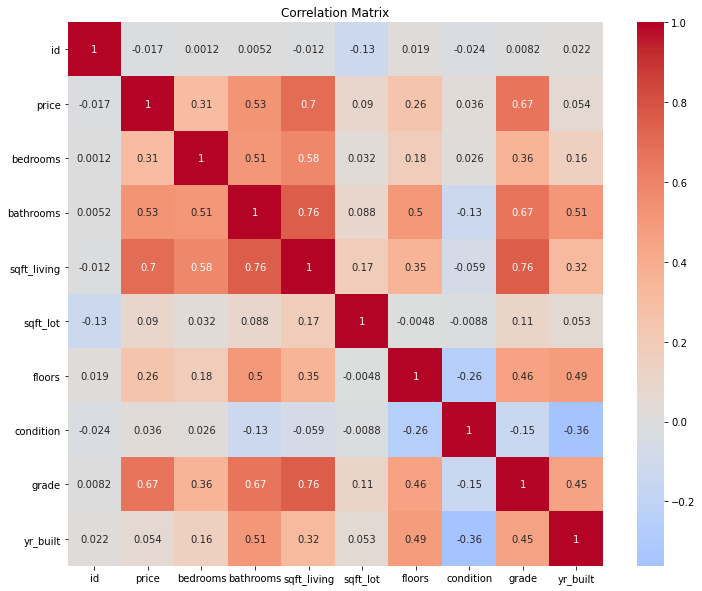

In [15]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')

# This sets the yticks "upright" with 0, as opposed to sideways with 90.
plt.yticks(rotation=0) 

plt.show()

### Correlation Interpretation
We use the .corr() method to find the features correlated with "price" :

In [16]:
df.corr()["price"]

id            -0.016772
price          1.000000
bedrooms       0.308787
bathrooms      0.525906
sqft_living    0.701917
sqft_lot       0.089876
floors         0.256804
condition      0.036056
grade          0.667951
yr_built       0.053953
Name: price, dtype: float64

Based on the correlation coefficients with price from the kc housing dataset, the most important features are:

**bathrooms** - Number of bathrooms/bedrooms

 - Justification: bathrooms have a moderate positive correlation with price (0.53). This indicates that as the average number  of bathrooms per dwelling increases, the price tends to increase as well.

**grade** - overall grade given to the housing unit, based on King County grading system

 - Justification: grade has a strong positive correlation with price (0.67). This indicates that as the grade increases, the  price tends to increase as well.

**sqft_living** - square footage of the home

 - Justification: sqft_living has a strong positive correlation with price (0.7). This indicates that as the living space  squarefeet increases, the price tends to increase as well.

## Modelling
### Simple Linear Regression Model
The "sqft_living" feature has the highest correlation with "price" , so we will use it to build a simple linear regression model

In [17]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [18]:
# Define the formula for the simple linear regression model
simple_formula = 'price ~ sqft_living'
# Create and fit the model
simple_model = ols(simple_formula, df).fit()
# Summarize the model
simple_model_summary = simple_model.summary()
# Print the summary
simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        22:08:23   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Interpreting the Simple Linear Regression Model Metrics
1. How much of the variance is explained by this model - a floating point number between 0 and 1.
2. Is the model statistically significant at a=0.05 — result is a boolean, that is, either True or False.

In [19]:
# Extract R-squared value
r_squared = simple_model.rsquared

# Determine if the model is statistically significant
model_is_significant = simple_model.f_pvalue < 0.05
r_squared, model_is_significant

(0.4926878990403508, True)

### Multiple Linear Regression Model
Here, we'll build a model that contains all of the features present in df

#### Model 1
For the first model, we'll use the following features:
 - bedrooms
 - bathrooms
 - sqft_living
 - floors

In [20]:
# Multiple Linear Regression Model 1
multiple_formula_1 = 'price ~ bedrooms + bathrooms + sqft_living + floors'
multiple_model_1 = ols(multiple_formula_1, data=df).fit()
multiple_model_1_summary = multiple_model_1.summary()

multiple_model_1_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     5550.
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        22:08:23   Log-Likelihood:            -2.9975e+05
No. Observations:               21597   AIC:                         5.995e+05
Df Residuals:                   21592   BIC:                         5.996e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    7.587e+04   7707.527      9.843      0.000    6.08e+04     9.1e+04
bedrooms    -5.854e+04   2359.336    -24.811      0.000   -6.32e+04   -5.39e+04
bathrooms    7423.0749   3832.235      1.937      0.053     -88.389    1.49e+04
sqft_living   310.1895      3.102    100.006      0.000     304.110     316.269
floors        592.7205   3785.179      0.157      0.876   -6826.510    8011.951
==============================================================================
Omnibus:                    14420.569   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           491336.665
Skew:                           2.735   Prob(JB):                         0.00
Kurtosis:                      25.718   Cond. No.                     1.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Model 2
For the second model, we'll use the following features:
 - sqft_lot
 - waterfront
 - condition
 - grade
 - yr_built

In [21]:
#Encode categorical variable waterfront 
df['waterfront'] = df['waterfront'].apply(lambda x: 1 if x == 1 else 0)

# Multiple Linear Regression Model 2
multiple_formula_2 = 'price ~ sqft_lot + waterfront + condition + grade + yr_built'
multiple_model_2 = ols(multiple_formula_2, data=df).fit()
multiple_model_2_summary = multiple_model_2.summary()

multiple_model_2_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     5498.
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        22:08:23   Log-Likelihood:            -2.9852e+05
No. Observations:               21597   AIC:                         5.971e+05
Df Residuals:                   21591   BIC:                         5.971e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.321e+06   1.31e+05     40.604      0.000    5.06e+06    5.58e+06
sqft_lot       0.0988      0.040      2.450      0.014       0.020       0.178
waterfront  8.603e+05   2.04e+04     42.263      0.000     8.2e+05       9e+05
condition   2.742e+04   2734.549     10.027      0.000    2.21e+04    3.28e+04
grade       2.444e+05   1597.823    152.983      0.000    2.41e+05    2.48e+05
yr_built   -3426.5904     67.128    -51.046      0.000   -3558.165   -3295.015
==============================================================================
Omnibus:                    19019.767   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2130932.320
Skew:                           3.749   Prob(JB):                         0.00
Kurtosis:                      51.081   Cond. No.                     3.48e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Train-Test Split
We'll split the data into training and testing sets.

In [22]:
from sklearn.model_selection import train_test_split

# Define the features and the target
X = df.drop('price', axis=1)
y = df['price']

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)